# Simulation of an AWGN baseband transmission

This example emulates a real valued baseband transmission, including bit generation, mapping, pulseshaping, matched filtering, decision, demapping and ber counting.

The channel is emulated as AWGN channel with adjustable SNR.

## Load required packages

In [1]:
import numpy as np
try:
    # if you installed skcomm with pypi
    import skcomm  as skc
except:
    # if you like to use skcomm directly from source.
    # Please note: If you want to import skcomm into your file using this snippet, you must ensure that the file is on a directional level below skcomm.
    import sys, os
    current_parent_folder = os.path.abspath('..')
    sys.path.append(os.path.join(current_parent_folder))
    import skcomm as skc

## Simulation parameters

In [2]:
symbol_rate = 10.0
n_bits = 2**15
constellation = np.asarray([-3,3])
pulseshape = 'rrc'
roll_off = 0.1
snr = 20

## Transmitter

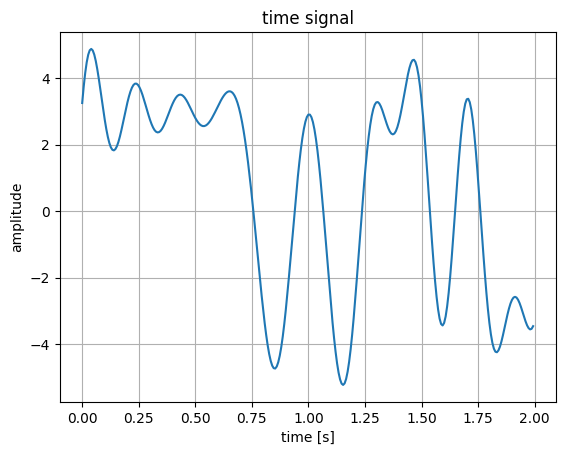

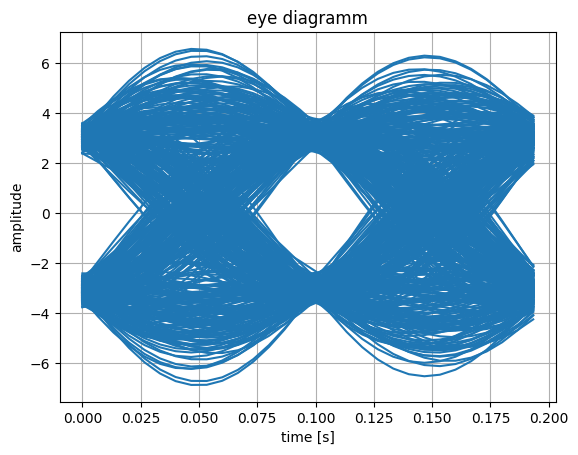

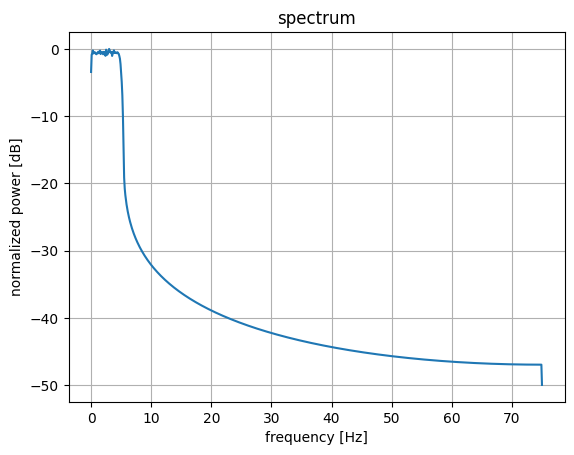

In [3]:
# Tx
sig_tx = skc.signal.Signal(n_dims=1)
sig_tx.generate_bits(n_bits=n_bits,seed=1)
sig_tx.symbol_rate = symbol_rate
# generate constellation (symbol alphabet)
sig_tx.constellation = constellation
# mapping
sig_tx.mapper()
# pulseshaping
upsampling = 15
sig_tx.pulseshaper(upsampling=upsampling,pulseshape=pulseshape,roll_off=roll_off)
sig_tx.plot_signal(boundaries=[0,upsampling*20])
sig_tx.plot_eye(boundaries=[0,upsampling*1000])
_ = sig_tx.plot_spectrum(scale='logNorm', resolution_bw=symbol_rate/100)

## Channel

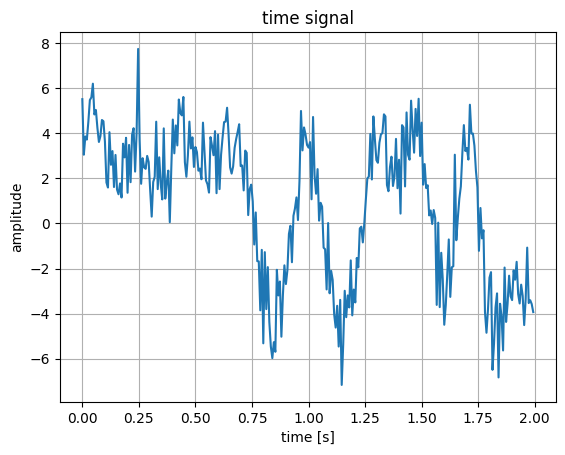

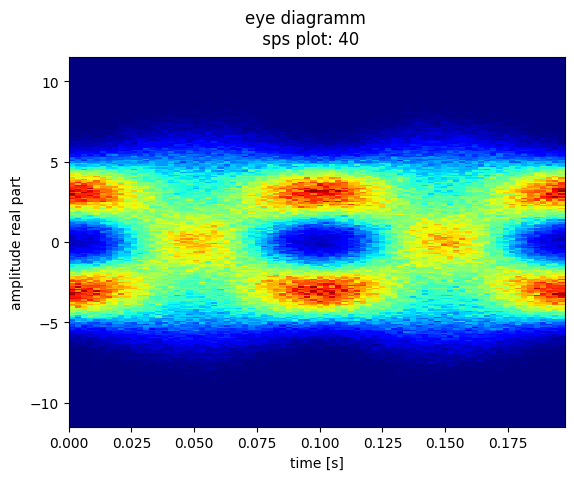

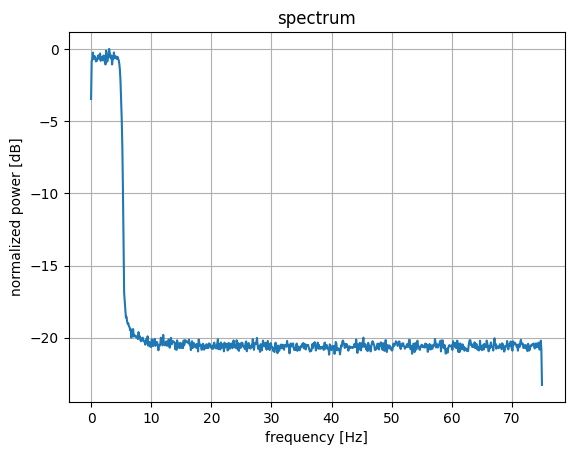

In [4]:

# channel
sig_tx.set_snr(snr_dB=snr)
sig_tx.plot_signal(boundaries=[0,upsampling*20])
sig_tx.plot_eye(histogram=True)
_ = sig_tx.plot_spectrum(scale='logNorm',resolution_bw=symbol_rate/100)


## Receiver


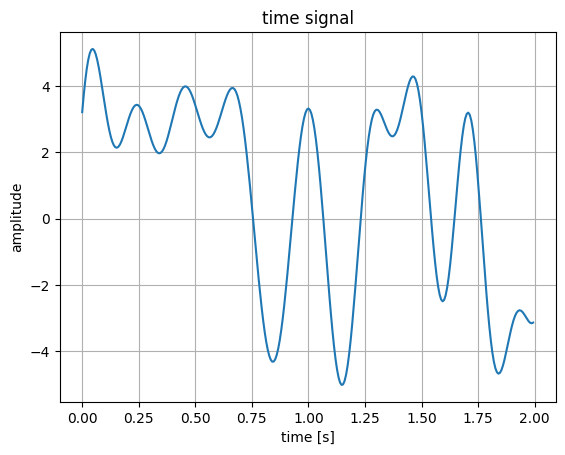

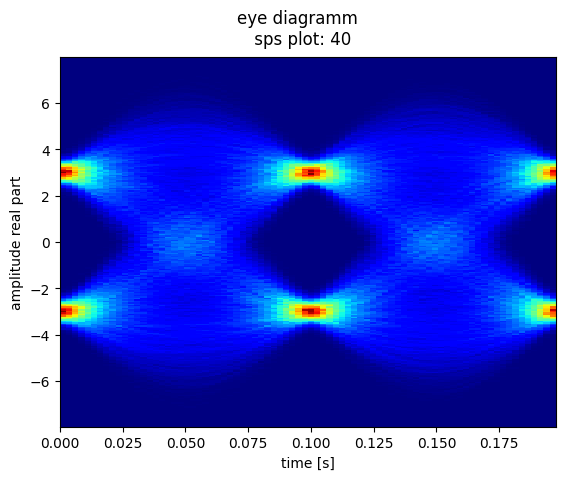

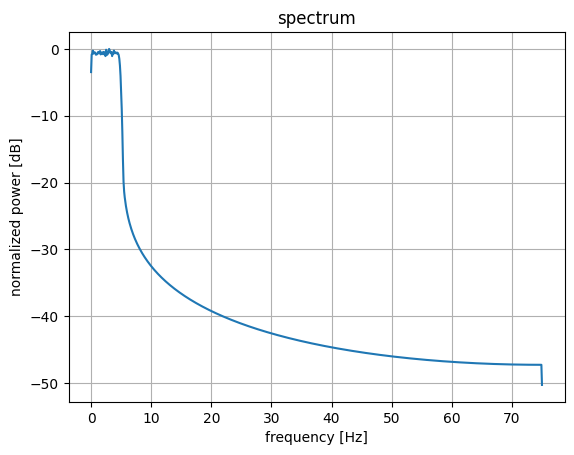

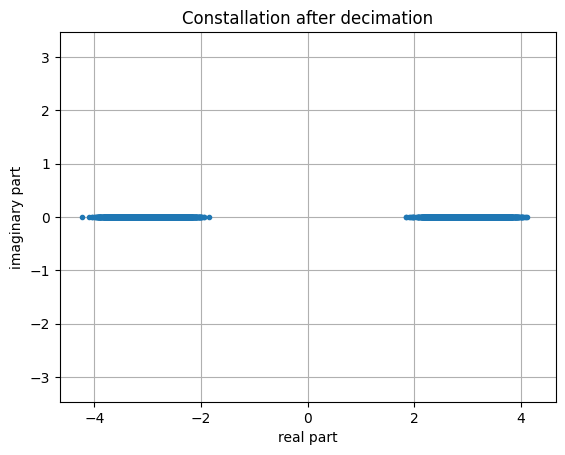

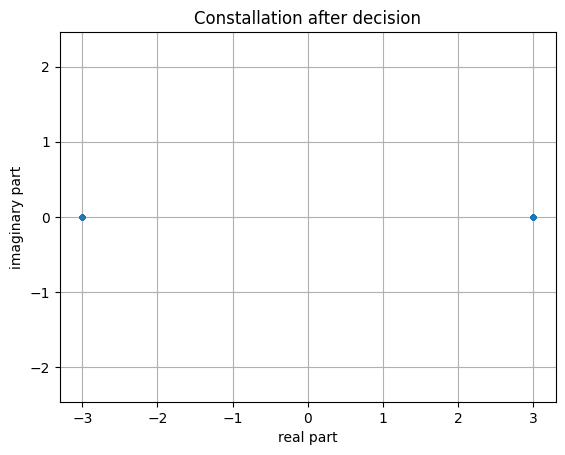

Bit error rate = 0.00e+00


/Users/knister/Documents/HTW/tmp/comm/.venv/lib/python3.13/site-packages/numpy/_core/numeric.py:442: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [5]:

# Rx 
sig_rx = sig_tx.copy()
sig_rx.samples[0] = skc.filters.raised_cosine_filter(sig_rx.samples[0],
                                 sample_rate=sig_rx.sample_rate[0],
                                 symbol_rate=sig_rx.symbol_rate[0],
                                 roll_off=0.1,
                                 root_raised=True).real
                                 
# sig_rx.samples[0] = skc.filters.ideal_lp(sig_rx.samples[0], 0.1)['samples_out'].real
sig_rx.plot_signal(boundaries=[0,upsampling*20])
sig_rx.plot_eye(histogram=True)
sig_rx.plot_spectrum(scale='logNorm',resolution_bw=symbol_rate/100)

# smpling
sig_rx.samples[0] = sig_rx.samples[0][::15]
sig_rx.plot_constellation(tit='Constallation after decimation')

sig_rx.decision()
sig_rx.plot_constellation(tit='Constallation after decision')
sig_rx.demapper()
ber = skc.rx.count_errors(sig_tx.bits[0], sig_rx.samples[0])

print(f"Bit error rate = {ber['ber']:.2e}")
